## Image Transformation

```text
- This is the process of applying a transformation to the image in order to improve the performance of the deep learning model.

Types
-----
- Rotation
- Scaling
- Resizing
- Cropping
- Flipping, etc.

Applications/Benefits
---------------------
- Pre-trained models (e.g. CNNs) are trained for certain image sizes and might require you to resize the input data before the pre-trained model can be used.
- Transformed images are a way of increasing the total amount of available training data. i.e. data augmentation.
- It can help to regularize the model and prevent overfitting.
- It can also help improve the generalisation performance of the model.
```

In [1]:
import numpy as np
import torch

# NEW!
import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt
from IPython import display

display.set_matplotlib_formats("svg")

# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

/var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_83605/3053684.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


In [2]:
# The list of datasets that come with torchvision: https://pytorch.org/vision/stable/index.html

fp = "../../data/cifar10"
# Download the CIFAR10 dataset
cifar_data = torchvision.datasets.CIFAR10(root=fp, download=True)

Files already downloaded and verified


In [3]:
print(cifar_data)

# Check out the shape of the dataset
cifar_data.data.shape

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../../data/cifar10
    Split: Train


(50000, 32, 32, 3)

In [4]:
# Check the targets
len(cifar_data.targets)

50000

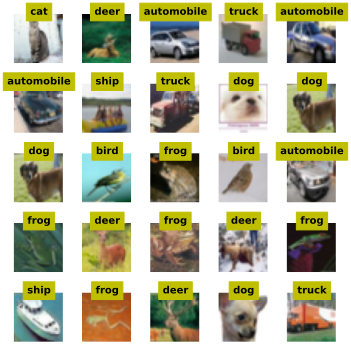

In [5]:
# Visualize some samples from the data.
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(5, 5))

for ax in axs.flatten():
    # Select random image
    rand_idx = np.random.choice(len(cifar_data.targets))

    # Extract that image
    pic = cifar_data.data[rand_idx, :, :, :]
    # Extract the label
    label = cifar_data.classes[cifar_data.targets[rand_idx]]

    # Visualize the image
    ax.imshow(pic)
    # Annotate the image
    ax.text(
        16, 0, label, ha="center", fontweight="bold", color="k", backgroundcolor="y"
    )
    ax.axis("off")

plt.tight_layout()
plt.show()

In [6]:
# Apply transformations: List of transforms
Txns = T.Compose(
    [
        T.ToTensor(),
        T.Resize(32 * 4),  # Upscale the image by a factor of 4
        T.Grayscale(num_output_channels=1),  # Convert to grayscale
    ]
)
Txns

Compose(
    ToTensor()
    Resize(size=128, interpolation=bilinear, max_size=None, antialias=warn)
    Grayscale(num_output_channels=1)
)

In [7]:
dir(cifar_data)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_integrity',
 '_format_transform_repr',
 '_is_protocol',
 '_load_meta',
 '_repr_indent',
 'base_folder',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'filename',
 'meta',
 'root',
 'target_transform',
 'targets',
 'test_list',
 'tgz_md5',
 'train',
 'train_list',
 'transform',
 'transforms',
 'url']

In [8]:
# Include the transformations in the dataset
cifar_data.transform = Txns

In [9]:
cifar_data.data.shape

(50000, 32, 32, 3)

In [10]:
# Important! Adding a transform doesn't change the image data
IDX = 20
print(cifar_data.data[IDX, :, :, :].shape)

(32, 32, 3)


In [11]:
# Apply the transformations
# Method 1
image_1 = Txns(cifar_data.data[IDX, :, :, :])

# Method 2
image_2 = cifar_data.transform(cifar_data.data[IDX, :, :, :])

/Users/neidu/miniconda3/envs/torch_p310/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


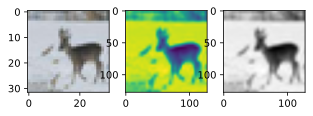

In [12]:
# Visualize the transformations
fig, ax = plt.subplots(1, 3, figsize=(5, 5))

ax[0].imshow(cifar_data.data[IDX, :, :, :])
ax[1].imshow(torch.squeeze(image_1))  # Matplotlib uses this default cmap
ax[2].imshow(torch.squeeze(image_2), cmap="gray")  # Use gray cmap instead

plt.show()